In [1]:
from datadreamer import DataDreamer
from datadreamer.llms import OpenAI
from datadreamer.steps import DataFromPrompt, Embed, CosineSimilarity, concat
from datadreamer.embedders import SentenceTransformersEmbedder
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

/Users/Justin Qiu/Desktop/NLP Research/Synthetic Data Probing/project_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.environ["OPENAI_API_KEY"] = input("Enter OpenAI API Key")

In [10]:
with DataDreamer("./output"):
    gpt_4 = OpenAI(
        model_name="gpt-4",
        organization="org-bgAXfs8WdU5942SLngg0OGpd"
    )

    formal_data = DataFromPrompt(
        "Generate Data with Formal Style",
        args={
            "llm": gpt_4,
            "n": 100,
            "temperature": 1.2,
            "instruction": (
                "Generate a sentence with a very formal style. Respond with only the sentence."
            ),
        },
        outputs={"generations": "sentences"},
    )
    informal_data = DataFromPrompt(
        "Generate Data with Informal Style",
        args={
            "llm": gpt_4,
            "n": 100,
            "temperature": 1.2,
            "instruction": (
                "Generate a sentence with a very informal style. Respond with only the sentence."
            ),
        },
        outputs={"generations": "sentences"},
    )


[ 🤖 DataDreamer 💤 ] Initialized. 🚀 Dreaming to folder: ./output


[ 🤖 DataDreamer 💤 ] Step 'Generate Data with Formal Style' results loaded from disk. 🙌 It was previously run and saved.
[ 🤖 DataDreamer 💤 ] Step 'Generate Data with Informal Style' was previously run and saved, but was outdated. 😞
[ 🤖 DataDreamer 💤 ] Step 'Generate Data with Informal Style' is running. ⏳
[ 🤖 DataDreamer 💤 ] Step 'Generate Data with Informal Style' finished and is saved to disk. 🎉
[ 🤖 DataDreamer 💤 ] Done. ✨ Results in folder: ./output


In [11]:
with DataDreamer("./output"):
    formal_embed = Embed(
        name = "Formal Data Embeddings",
        inputs = {
            "texts": formal_data.output["sentences"]
        },
        args = {
            "embedder": SentenceTransformersEmbedder(
                model_name="AnnaWegmann/Style-Embedding"
            )
        },
        outputs = {
            "texts": "sentences",
            "embeddings": "embeddings"
        },
    )
    informal_embed = Embed(
        name = "Informal Data Embeddings",
        inputs = {
            "texts": informal_data.output["sentences"]
        },
        args = {
            "embedder": SentenceTransformersEmbedder(
                model_name="AnnaWegmann/Style-Embedding"
            )
        },
        outputs = {
            "texts": "sentences",
            "embeddings": "embeddings"
        },
    )
    '''
    cos_sim = CosineSimilarity(
		name = "Cosine Similarities",
		inputs = {
			"a": pos_data.output["sentences"],
			"b": neg_data.output["sentences"]
		},
		args = {
			"embedder": SentenceTransformersEmbedder(
                model_name="AnnaWegmann/Style-Embedding"
            )
		},
		outputs = {
			"a": "pos_sentences",
			"b": "neg_sentences",
			"similarities": "cos_sim"
		},
	)
    '''

[ 🤖 DataDreamer 💤 ] Initialized. 🚀 Dreaming to folder: ./output
[ 🤖 DataDreamer 💤 ] Step 'Formal Data Embeddings' results loaded from disk. 🙌 It was previously run and saved.
[ 🤖 DataDreamer 💤 ] Step 'Informal Data Embeddings' was previously run and saved, but was outdated. 😞
[ 🤖 DataDreamer 💤 ] Step 'Informal Data Embeddings' is running. ⏳
[ 🤖 DataDreamer 💤 ] Step 'Informal Data Embeddings' finished and is saved to disk. 🎉
[ 🤖 DataDreamer 💤 ] Done. ✨ Results in folder: ./output


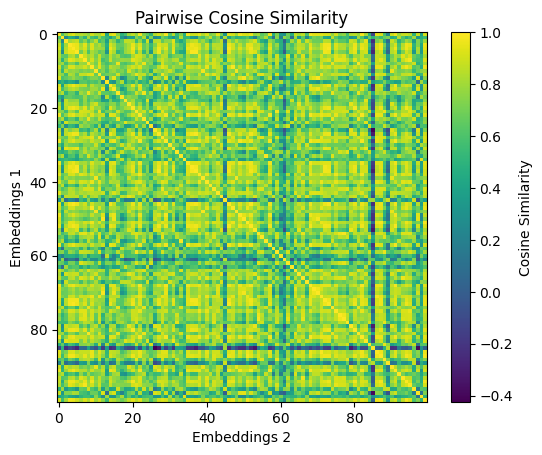

In [12]:
formal_embed_lst = [formal_embed.output["embeddings"][i] for i in range(formal_embed.output.num_rows)]
informal_embed_lst = [informal_embed.output["embeddings"][i] for i in range(informal_embed.output.num_rows)]
all_embed_lst = np.array(formal_embed_lst + informal_embed_lst)

embed_lst_1 = formal_embed_lst
embed_lst_2 = formal_embed_lst

cosine_similarities = cosine_similarity(embed_lst_1, embed_lst_2)
plt.imshow(cosine_similarities, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title('Pairwise Cosine Similarity')
plt.xlabel('Embeddings 2')
plt.ylabel('Embeddings 1')
# plt.xticks(ticks=np.arange(len(embed_lst_1)), labels=np.arange(1, len(embed_lst_1)+1))
# plt.yticks(ticks=np.arange(len(embed_lst_2)), labels=np.arange(1, len(embed_lst_2)+1))
plt.show()
np.fill_diagonal(cosine_similarities, np.nan)
avg_cos_sim_both_pos = np.nanmean(cosine_similarities)

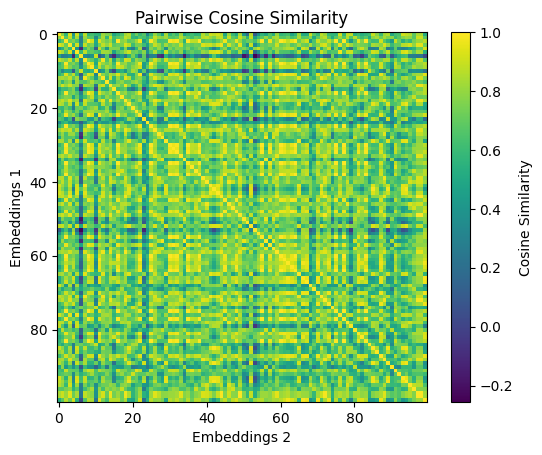

In [13]:
embed_lst_1 = informal_embed_lst
embed_lst_2 = informal_embed_lst

cosine_similarities = cosine_similarity(embed_lst_1, embed_lst_2)
plt.imshow(cosine_similarities, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title('Pairwise Cosine Similarity')
plt.xlabel('Embeddings 2')
plt.ylabel('Embeddings 1')
# plt.xticks(ticks=np.arange(len(embed_lst_1)), labels=np.arange(1, len(embed_lst_1)+1))
# plt.yticks(ticks=np.arange(len(embed_lst_2)), labels=np.arange(1, len(embed_lst_2)+1))
plt.show()
np.fill_diagonal(cosine_similarities, np.nan)
avg_cos_sim_both_neg = np.nanmean(cosine_similarities)

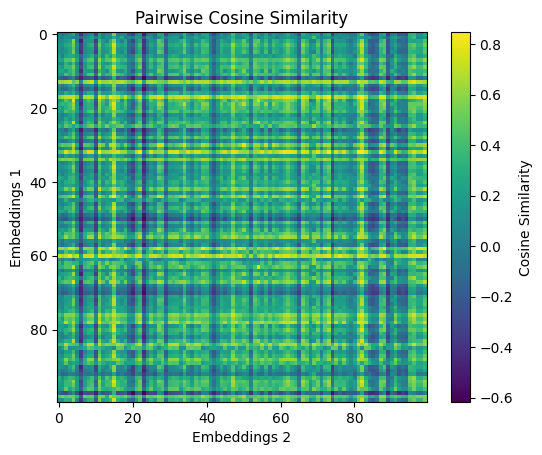

In [14]:
embed_lst_1 = formal_embed_lst
embed_lst_2 = informal_embed_lst

cosine_similarities = cosine_similarity(embed_lst_1, embed_lst_2)
plt.imshow(cosine_similarities, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title('Pairwise Cosine Similarity')
plt.xlabel('Embeddings 2')
plt.ylabel('Embeddings 1')
# plt.xticks(ticks=np.arange(len(embed_lst_1)), labels=np.arange(1, len(embed_lst_1)+1))
# plt.yticks(ticks=np.arange(len(embed_lst_2)), labels=np.arange(1, len(embed_lst_2)+1))
plt.show()
np.fill_diagonal(cosine_similarities, np.nan)
avg_cos_sim_pos_neg = np.nanmean(cosine_similarities)

In [15]:
print(avg_cos_sim_both_pos)
print(avg_cos_sim_both_neg)
print(avg_cos_sim_pos_neg)

0.6892865203633017
0.6950399278213024
0.23549327134029277


In [1]:
for i in range(5):
    print(formal_embed_lst.output["sentences"][i])

NameError: name 'formal_embed_lst' is not defined

In [ ]:
for i in range(5):
    print(informal_embed_lst.output["sentences"][i])

"The awful storm ruthlessly destroyed the serene village, leaving nothing but desolation and despair."
The daily drudgery of life seemed filled with disappointing sufferings, relentless frustrations, and despairing sorrows that nested deeply in his unhappy, gloomy heart.
This gloomy, dismal room filled me with a shivering dread that echoed the disturbing, dire secrets it withheld.
In the daunting Amazon rainforest, the researcher was constantly battling oppressive heat, wild snakes, and endless difficulty in locating endangered species.
Despite the constant misfortune, disappointment, grief, and despair, he persevered through the day with a heavy heart, haunted by past failures and feelings of bitterness and resentment.
